<a href="https://colab.research.google.com/github/Rmukherjee161003/CodeAlpha_Machine_Learning/blob/main/codealphaTASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

Root = "/content/archive (2).zip"

with zipfile.ZipFile(Root, 'r') as zip_ref:
    zip_ref.extractall("/content/extracted_archive")

os.chdir("/content/extracted_archive")

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/extracted_archive'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/extracted_archive/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_good_ps.wav',
 '/content/extracted_archive/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_vine_ps.wav',
 '/content/extracted_archive/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_puff_ps.wav',
 '/content/extracted_archive/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_bite_ps.wav',
 '/content/extracted_archive/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pike_ps.wav']

In [ ]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/extracted_archive/tess toronto emotio...,ps
1,/content/extracted_archive/tess toronto emotio...,ps
2,/content/extracted_archive/tess toronto emotio...,ps
3,/content/extracted_archive/tess toronto emotio...,ps
4,/content/extracted_archive/tess toronto emotio...,ps


In [ ]:
df['label'].value_counts()

,count
label,
ps,400
sad,400
angry,400
fear,400
neutral,400
happy,400
disgust,400


<Axes: xlabel='label', ylabel='count'>

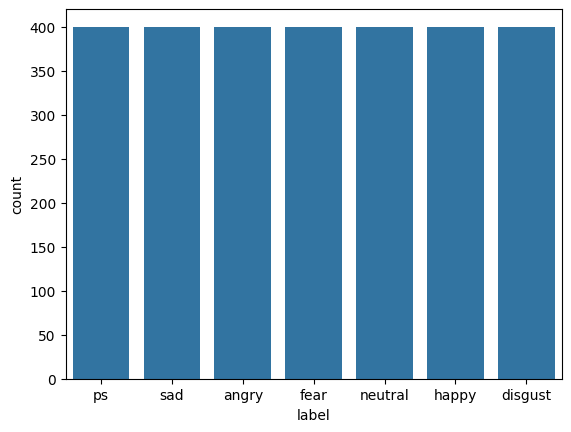

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

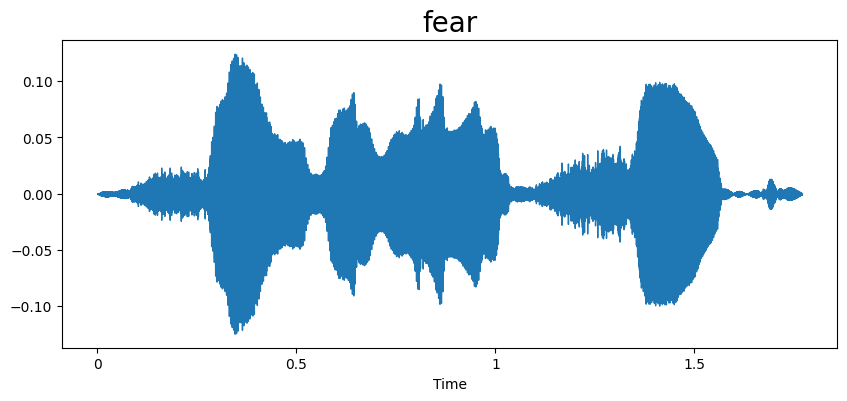

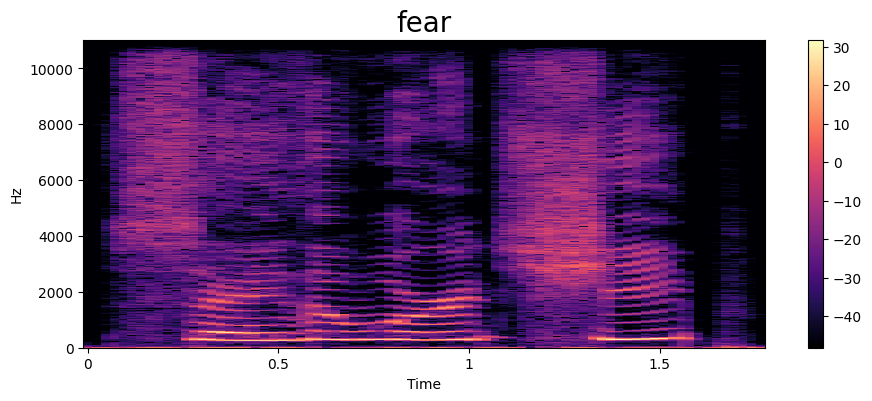

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

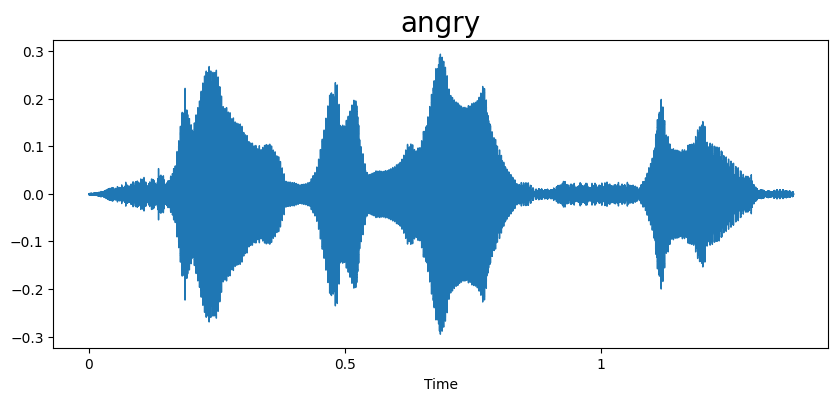

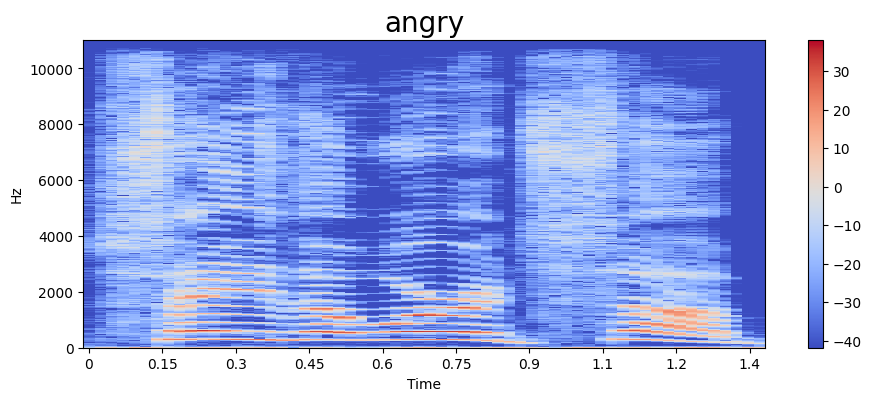

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

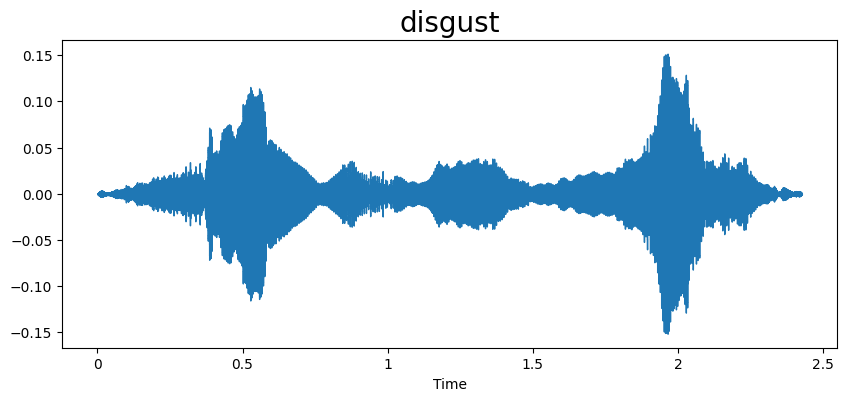

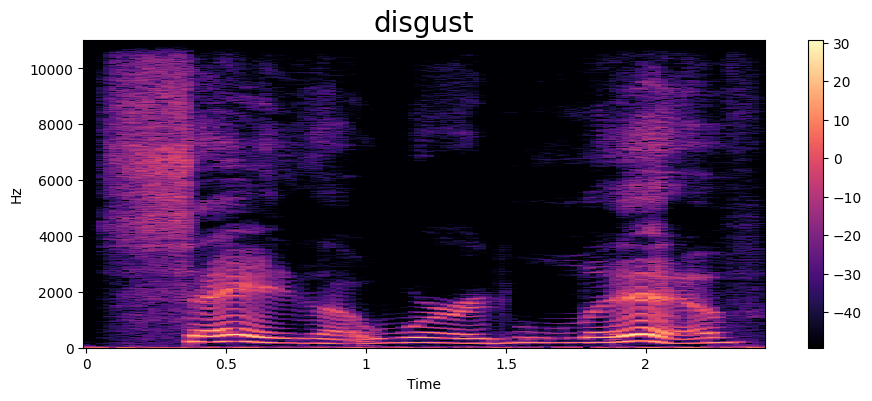

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

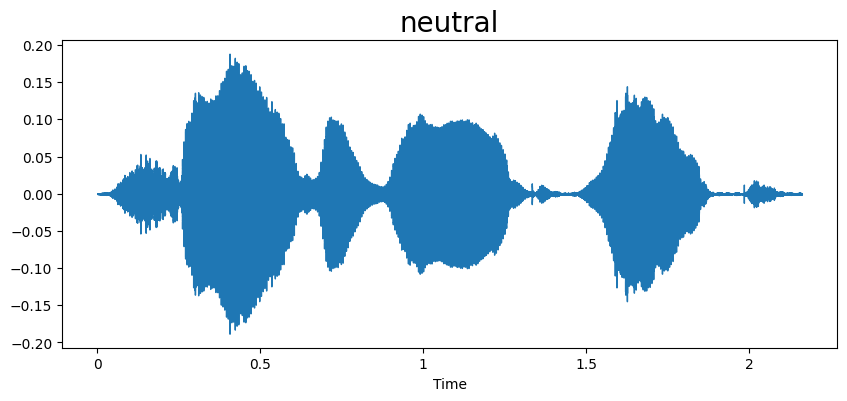

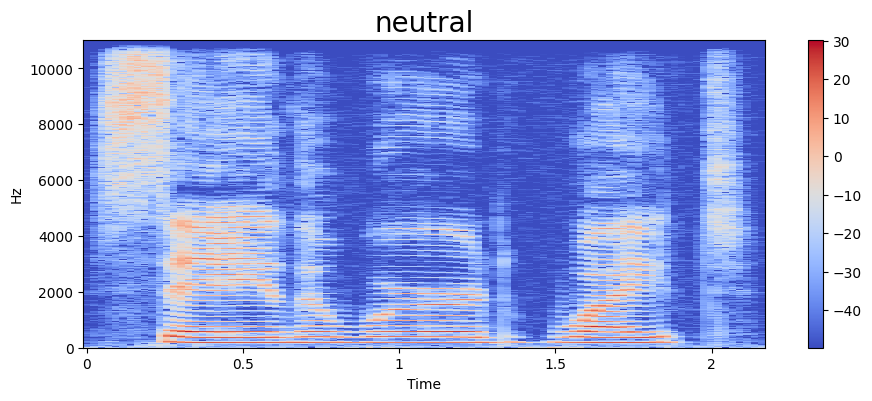

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

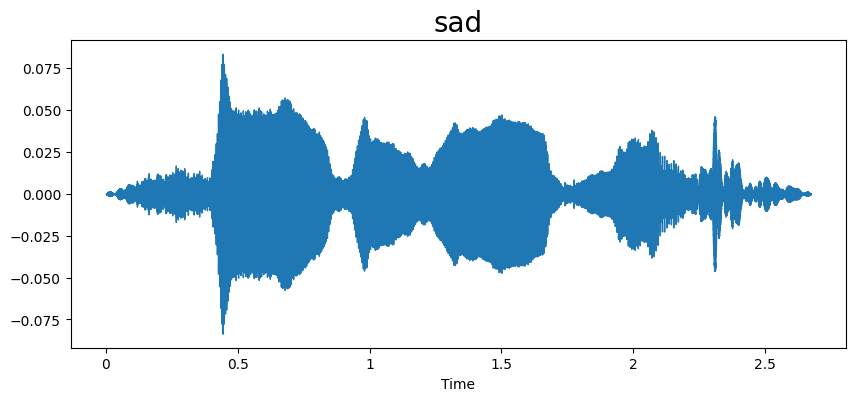

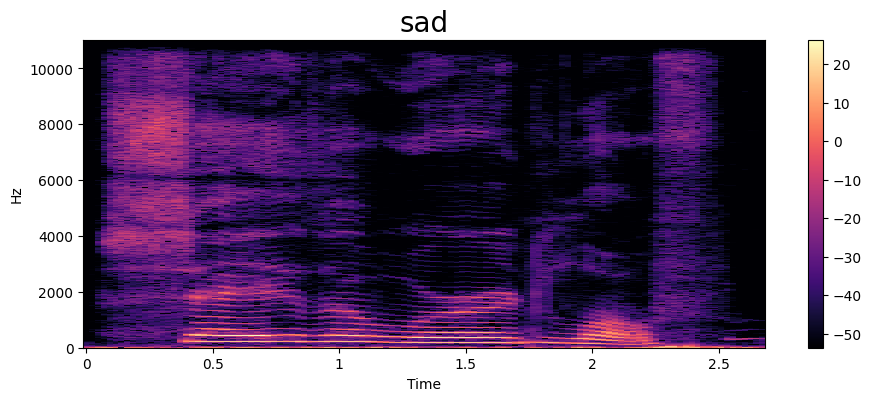

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

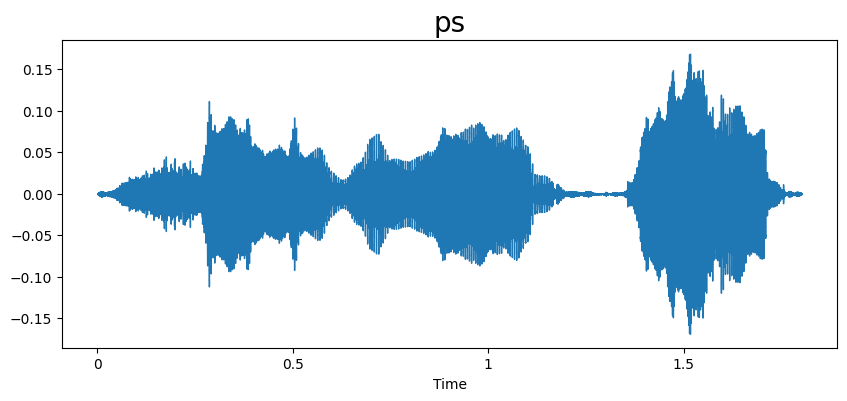

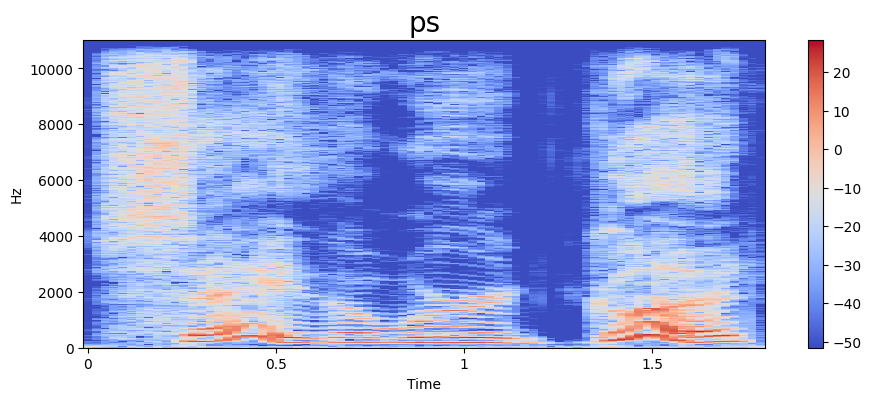

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

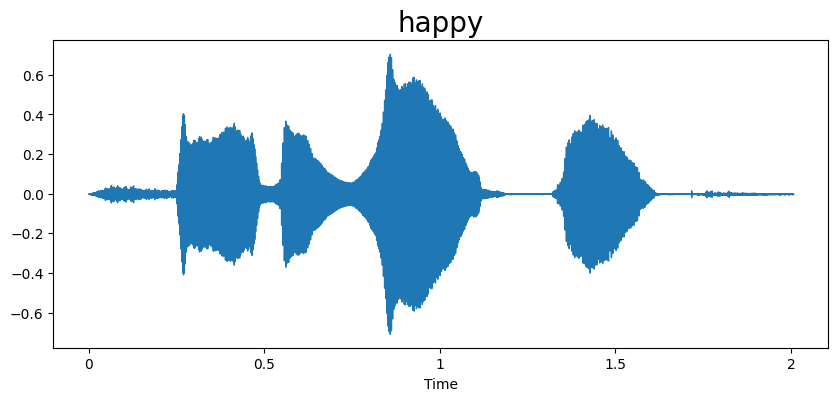

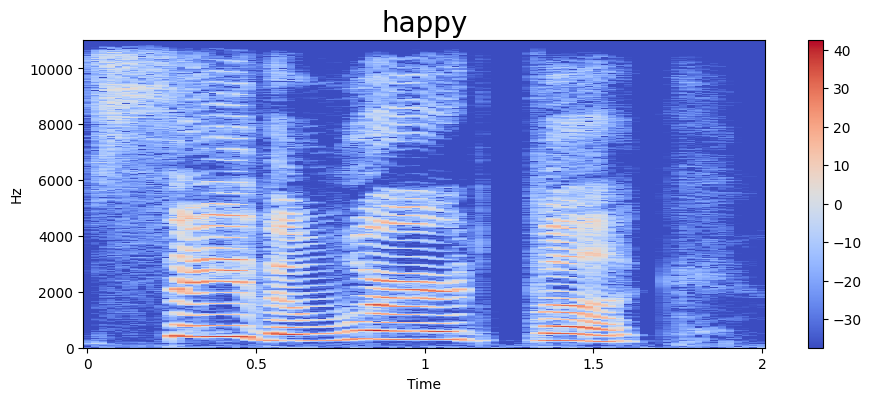

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.3072769e+02,  1.0968170e+02,  1.7197834e+01, -1.2594558e+01,
        1.4028738e+01,  2.9562600e+00, -1.1038024e+01, -4.3631549e+00,
       -2.2309647e+01,  1.8935987e+00, -1.2949123e+01, -9.1044521e+00,
       -2.5509496e+00, -3.8813286e+00, -2.4081941e+00, -5.8082968e-01,
       -2.4290292e+00,  6.6956081e+00, -2.6562824e+00, -2.6424525e+00,
       -2.4383693e+00,  1.4807887e+00, -3.9747760e-01,  4.2695382e-01,
       -5.1799483e+00,  2.7101994e+00, -7.2805214e+00,  6.9080167e+00,
       -2.6525810e+00,  4.1273661e+00, -1.2485397e+00,  8.0324304e-01,
       -2.7097137e+00,  1.2633225e+00,  3.6762006e+00,  1.1957163e+01,
        1.4322880e+01,  2.0696571e+01,  1.6858786e+01,  1.5334297e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-430.7277, 109.6817, 17.197834, -12.594558, 1..."
1,"[-446.69797, 107.021965, 5.321431, -18.838326,..."
2,"[-445.4041, 93.353004, 2.4792054, -16.53722, 0..."
3,"[-448.51297, 98.16754, 17.327938, -1.6703792, ..."
4,"[-403.4053, 95.46842, -1.1253117, -6.45312, 4...."
...,...
2795,"[-389.76962, 71.088005, 10.138043, 21.090853, ..."
2796,"[-357.3426, 80.78761, 14.469138, 3.7908616, -3..."
2797,"[-371.09683, 46.388634, 8.632398, 16.749046, -..."
2798,"[-355.4593, 60.20573, 3.6716237, 11.351785, -1..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.3413 - loss: 1.6211 - val_accuracy: 0.4929 - val_loss: 1.0548
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.7813 - loss: 0.5941 - val_accuracy: 0.5786 - val_loss: 1.2839
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9112 - loss: 0.2881 - val_accuracy: 0.6232 - val_loss: 1.2448
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.9329 - loss: 0.2173 - val_accuracy: 0.6625 - val_loss: 1.4634
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.9545 - loss: 0.1423 - val_accuracy: 0.5268 - val_loss: 2.2444
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.9386 - loss: 0.2105 - val_accuracy: 0.6321 - val_loss: 1.9502
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.9516 - loss: 0.1472 - val_accuracy: 0.6000 - val_loss: 1.9132
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.9661 - loss: 0.1159 - val_accuracy:

# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

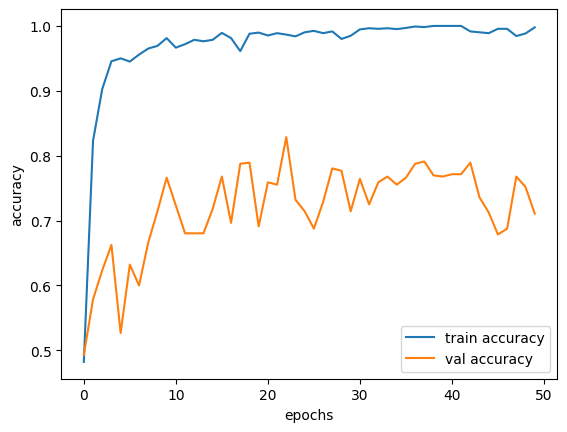

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

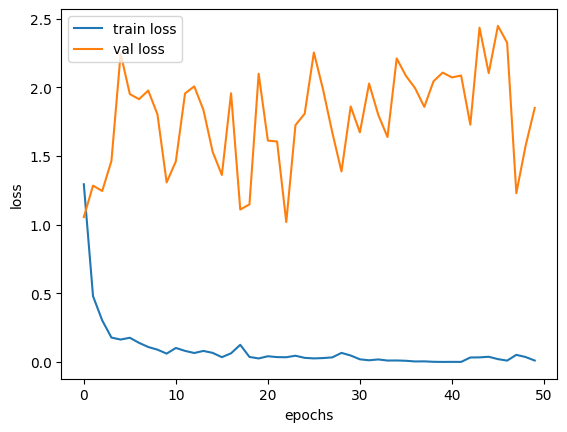

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()